# 

In [516]:
from sklearn import metrics
from math import exp, log
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from datetime import datetime

# Загрузка и подготовка датасета 

### Сохраняем данные и перемешиваем

In [517]:
df = pd.read_csv('E:/repository/carsPrediction/dromDataset3.csv')
df = shuffle(df)
df.head()

,model,price,year,engine_capacity,engine_power,engine_type,transmition_type,drive_type,mileage
2938,Nissan Murano,1170000,2010,3.5,249,бензин,вариатор,4WD,238
4730,Honda Fit Shuttle,840000,2012,1.3,88,гибрид,вариатор,передний,104
2822,Nissan Fuga,1200000,2011,3.7,333,бензин,АКПП,4WD,238
5067,Nissan Note,815000,2018,1.2,79,бензин,вариатор,4WD,92
3435,Nissan Note,1080000,2019,1.2,79,гибрид,АКПП,4WD,83


### Смотрим информацию о датасете и проверяем на наличие нулевых значений

In [518]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8097 entries, 2938 to 2989
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             8097 non-null   object 
 1   price             8097 non-null   int64  
 2   year              8097 non-null   int64  
 3   engine_capacity   8097 non-null   float64
 4   engine_power      8097 non-null   int64  
 5   engine_type       8097 non-null   object 
 6   transmition_type  8097 non-null   object 
 7   drive_type        8097 non-null   object 
 8   mileage           8097 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 632.6+ KB


model               0
price               0
year                0
engine_capacity     0
engine_power        0
engine_type         0
transmition_type    0
drive_type          0
mileage             0
dtype: int64

In [519]:
#Удаляем модели авто и оставляем только марки
df['model'] = df['model'].str.split().str[0]
df.head()

,model,price,year,engine_capacity,engine_power,engine_type,transmition_type,drive_type,mileage
2938,Nissan,1170000,2010,3.5,249,бензин,вариатор,4WD,238
4730,Honda,840000,2012,1.3,88,гибрид,вариатор,передний,104
2822,Nissan,1200000,2011,3.7,333,бензин,АКПП,4WD,238
5067,Nissan,815000,2018,1.2,79,бензин,вариатор,4WD,92
3435,Nissan,1080000,2019,1.2,79,гибрид,АКПП,4WD,83


In [520]:
#Количество авто по производителям
type_counts = df.groupby('model').size()
print(type_counts)

model
Audi               21
BMW               471
Honda            4496
Infiniti           24
Jaguar              3
Land               12
Mazda             123
Mercedes-Benz     110
Nissan           2837
dtype: int64


<Axes: >

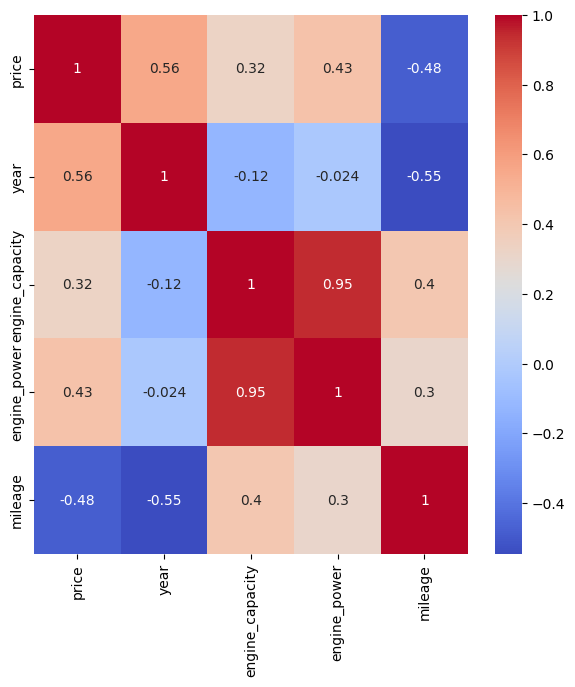

In [521]:
#строим тепловую карту корреляции
corr_matrix = df[['price', 'year', "engine_capacity", "engine_power",'mileage']].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

In [522]:
#записываем в "y" зависимую переменную, все зависимые в "x"

y = df['price']
X = df.drop(['price'], axis = 1)

In [523]:
#преобразуем столбцы в даммми переменные
Xcat = pd.get_dummies(X[["model", "engine_type","transmition_type", "drive_type"]], drop_first = True)


,model_BMW,model_Honda,model_Infiniti,model_Jaguar,model_Land,model_Mazda,model_Mercedes-Benz,model_Nissan,engine_type_гибрид,engine_type_дизель,transmition_type_автомат,transmition_type_вариатор,transmition_type_механика,transmition_type_робот,drive_type_задний,drive_type_передний
2938,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4730,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2822,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5067,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3435,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4322,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
6427,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7200,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [524]:
#записываем дамми перменные в переменную "Xnum"

Xnum = X[['year', 'engine_capacity', 'engine_power', 'mileage']]

In [525]:
#соединиям новые дамми переменные с количественными показателями

X = pd.concat([Xcat, Xnum], axis = 1) 
X.shape

(8097, 20)

In [526]:
#разделение на тренировочные и тестовые данные в соотношении 30:70
X_train = X[0:5684]
y_train = y[0:5684]
X_test = X[5684:]
y_test = y[5684:]

# Модели машинного обучения

## Модель Множественной линейной регрессии

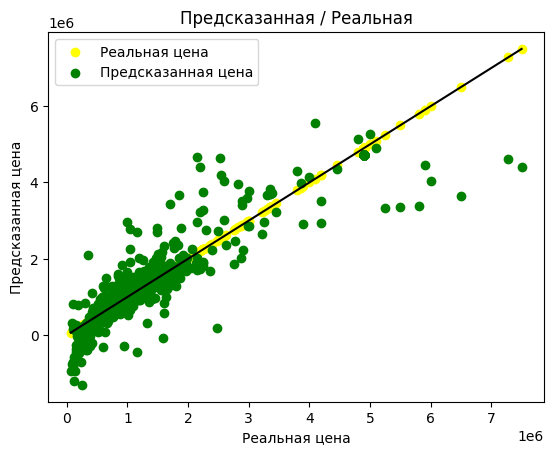

R2 Линейной регрессии: 0.8847465506744503


In [527]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

#прогнозируем значения
y_pred = LinReg.predict(X_test)

percent_errors = np.abs((y_test - y_pred) / y_test) * 100
LinReg_error = np.mean(percent_errors)

#строим график предсказанных и реальных цен авто
plt.scatter(y_test, y_test, color='yellow', label='Реальная цена')

# Добавим на этот же график график предсказанных цен
plt.scatter(y_test, y_pred, color='green', label='Предсказанная цена')

#Добавим 45-градусную линию
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')

plt.title('Предсказанная / Реальная')
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.legend()
plt.show()

print("R2 Линейной регрессии:", LinReg.score(X_train,y_train))

C:\Users\kim_r\AppData\Local\Temp\ipykernel_9612\3371961599.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - LinReg.predict(X_test))


Text(0.5, 1.0, 'Диаграмма остатков')

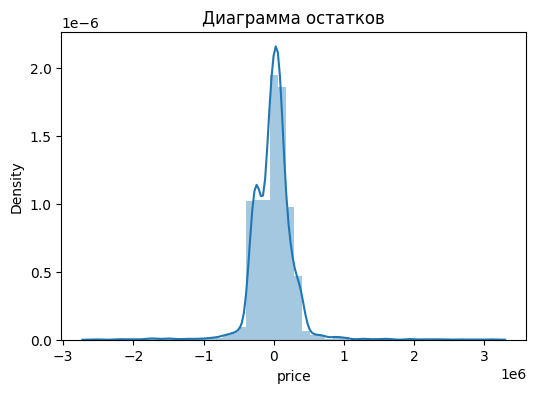

In [528]:
#создаём гистограммы остатков

plt.figure(figsize=(6,4))
sns.distplot(y_test - LinReg.predict(X_test))
plt.title('Диаграмма остатков')

## Модель KNN Regressor


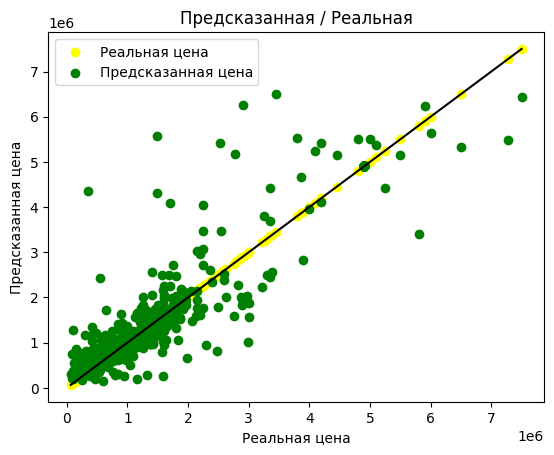

R2 Knn 0.9555385943881132


In [529]:
from sklearn import neighbors
from math import sqrt

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(metrics.mean_squared_error( y_test, Knn.predict(X_test))) 


#прогнозируем значения
y_pred = Knn.predict(X_test)

percent_errors = np.abs((y_test - y_pred) / y_test) * 100
Knn_error = np.mean(percent_errors)

#строим график предсказанных и реальных цен авто
plt.scatter(y_test, y_test, color='yellow', label='Реальная цена')

# Добавим на этот же график график предсказанных цен
plt.scatter(y_test, y_pred, color='green', label='Предсказанная цена')

#Добавим 45-градусную линию
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')

plt.title('Предсказанная / Реальная')
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.legend()
plt.show()

print('R2 Knn', Knn.score(X_train, y_train))

C:\Users\kim_r\AppData\Local\Temp\ipykernel_9612\1515613699.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - Knn.predict(X_test))


Text(0.5, 1.0, 'Диаграмма остатков')

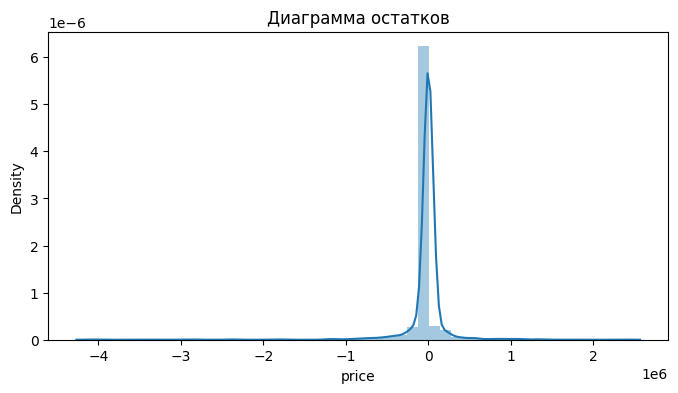

In [530]:
#создаём гистограммы остатков

plt.figure(figsize=(8,4))
sns.distplot(y_test - Knn.predict(X_test))
plt.title('Диаграмма остатков')

## Модель Random Forest Regressor

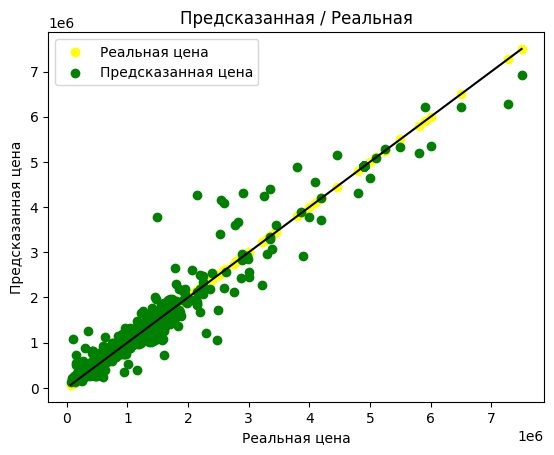

R2 Случайный лес 0.9950046873000159


In [531]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)

#прогнозируем значения
y_pred = RForest.predict(X_test)

percent_errors = np.abs((y_test - y_pred) / y_test) * 100
RForest_error = np.mean(percent_errors)

#строим график предсказанных и реальных цен авто
plt.scatter(y_test, y_test, color='yellow', label='Реальная цена')
# Добавим на этот же график график предсказанных цен
plt.scatter(y_test, y_pred, color='green', label='Предсказанная цена')

#Добавим 45-градусную линию
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')

plt.title('Предсказанная / Реальная')
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.legend()
plt.show()

print('R2 Случайный лес', RForest.score(X_train,y_train))

C:\Users\kim_r\AppData\Local\Temp\ipykernel_9612\3588211820.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - RForest.predict(X_test))


Text(0.5, 1.0, 'Диаграмма остатков')

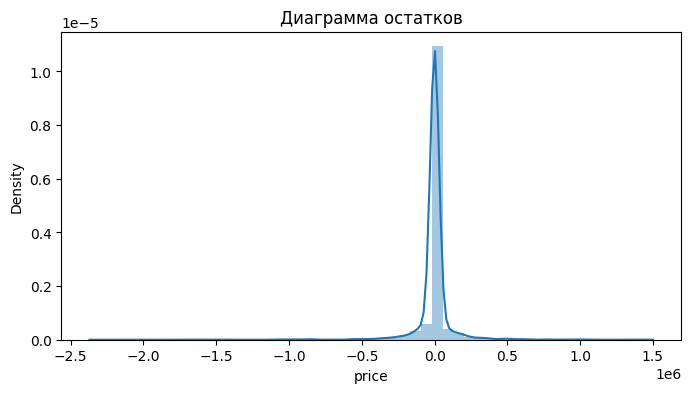

In [532]:
#создаём гистограммы остатков

plt.figure(figsize=(8,4))
sns.distplot(y_test - RForest.predict(X_test))
plt.title('Диаграмма остатков')

# Итоги

In [534]:
print("R2 Линейной регрессии:", LinReg.score(X_train,y_train))
print('Ошибка модель линейной регресси: ', LinReg_error)

print('R2 Knn', Knn.score(X_train, y_train))
print('Ошибка модель KNN  : ', Knn_error)

print('R2 Случайный лес', RForest.score(X_train,y_train))
print('Ошибка модель Случайного леса : ', RForest_error)

R2 Линейной регрессии: 0.8847465506744503
Ошибка модель линейной регресси:  22.417671489418932
R2 Knn 0.9555385943881132
Ошибка модель KNN  :  9.335000119825127
R2 Случайный лес 0.9950046873000159
Ошибка модель Случайного леса :  4.679228963592365
